## 1.1 Series数据

In [1]:
from pandas import Series,DataFrame
import pandas as pd

In [2]:
obj = Series([1, -2, 3, -4])
obj

0    1
1   -2
2    3
3   -4
dtype: int64

In [3]:
obj2 = Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj2

a    1
b   -2
c    3
d   -4
dtype: int64

In [4]:
obj2.values

array([ 1, -2,  3, -4], dtype=int64)

In [5]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
obj2['b']

-2

In [7]:
obj2['c'] = 23
obj2[['c', 'd']]

c    23
d    -4
dtype: int64

In [8]:
obj2

a     1
b    -2
c    23
d    -4
dtype: int64

In [9]:
obj2[obj2 < 0 ]

b   -2
d   -4
dtype: int64

In [10]:
obj2 * 2

a     2
b    -4
c    46
d    -8
dtype: int64

In [11]:
import numpy as np

In [12]:
np.abs(obj2)

a     1
b     2
c    23
d     4
dtype: int64

In [13]:
data = {
    '张三':92,
    '李四':78,
    '王五':68,
    '小明':82    
}

In [14]:
obj3 = Series(data)
obj3

张三    92
李四    78
王五    68
小明    82
dtype: int64

In [15]:
names = ['张三', '李四', '王五', '小明']
obj4 = Series(data, index=names)
obj4

张三    92
李四    78
王五    68
小明    82
dtype: int64

In [16]:
obj4.name = 'math'
obj4.index.name = 'students'

In [17]:
obj4

students
张三    92
李四    78
王五    68
小明    82
Name: math, dtype: int64

## 1.2dataframe

In [18]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [19]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2002],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [20]:
df = DataFrame(data, columns=['name', 'sex', 'year', 'city'])
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [21]:
df = DataFrame(data, columns=['name', 'sex', 'year', 'city'],index=['a', 'b', 'c', 'd'])
df

,name,sex,year,city
a,张三,female,2001,北京
b,李四,female,2001,上海
c,王五,male,2003,广州
d,小明,male,2002,北京


In [22]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [23]:
df.columns

Index(['name', 'sex', 'year', 'city'], dtype='object')

In [24]:
data2 = {
    'sex':{'张三':'female','李四':'female','王五':'male'},
    'city':{'张三':'北京','李四':'上海','王五':'广州'}
}
df2 = DataFrame(data2)
df2

,sex,city
张三,female,北京
李四,female,上海
王五,male,广州


In [25]:
df.index.name = 'id'
df.columns.name = 'std_info'

In [26]:
df

std_info,name,sex,year,city
id,,,,
a,张三,female,2001,北京
b,李四,female,2001,上海
c,王五,male,2003,广州
d,小明,male,2002,北京


## 1.3 索引对象

In [27]:
obj = Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [28]:
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object', name='id')

In [30]:
df.columns

Index(['name', 'sex', 'year', 'city'], dtype='object', name='std_info')

In [31]:
index = obj.index
index[1] = 'f'

TypeError: Index does not support mutable operations

In [32]:
df

std_info,name,sex,year,city
id,,,,
a,张三,female,2001,北京
b,李四,female,2001,上海
c,王五,male,2003,广州
d,小明,male,2002,北京


In [33]:
'sex' in df.columns

True

In [34]:
'f' in df.index

False

## 2.1 重新索引

In [35]:
obj = Series([1, -2, 3, -4], index=['b', 'a', 'c', 'd'])
obj

b    1
a   -2
c    3
d   -4
dtype: int64

In [36]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -2.0
b    1.0
c    3.0
d   -4.0
e    NaN
dtype: float64

In [37]:
obj = Series([1, -2, 3, -4], index=[0,2,3,5])
obj

0    1
2   -2
3    3
5   -4
dtype: int64

In [38]:
obj2 = obj.reindex(range(6),method='ffill')
obj2

0    1
1    1
2   -2
3    3
4    3
5   -4
dtype: int64

In [39]:
df = DataFrame(np.arange(9).reshape(3,3),index=['a','c','d'],columns=['name','id','sex'])
df

,name,id,sex
a,0,1,2
c,3,4,5
d,6,7,8


In [40]:
df2 = df.reindex(['a', 'b', 'c', 'd'])
df2

,name,id,sex
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [41]:
df3 = df.reindex(columns=['name', 'year', 'id'], fill_value=0)
df3

,name,year,id
a,0,0,1
c,3,0,4
d,6,0,7


## 2.2 更换索引

In [42]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'grade':[68, 78, 63, 92]
}
df = DataFrame(data)
df

,name,grade
0,张三,68
1,李四,78
2,王五,63
3,小明,92


In [43]:
df2 = df.sort_values(by='grade')
df2

,name,grade
2,王五,63
0,张三,68
1,李四,78
3,小明,92


In [44]:
df3 = df2.reset_index()
df3

,index,name,grade
0,2,王五,63
1,0,张三,68
2,1,李四,78
3,3,小明,92


In [45]:
df4 = df2.reset_index(drop=True)
df4

,name,grade
0,王五,63
1,张三,68
2,李四,78
3,小明,92


In [46]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2002],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [47]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


In [48]:
df3 = df2.reset_index()
df3

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


## 2.3 索引和选取

In [49]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [50]:
obj = Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [51]:
obj[1]

-2

In [52]:
obj['b']

-2

In [53]:
obj[['a','c']]

a    1
c    3
dtype: int64

In [54]:
obj[0:2]

a    1
b   -2
dtype: int64

In [55]:
obj['a':'c']

a    1
b   -2
c    3
dtype: int64

In [56]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2002],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [57]:
df['city']

0    北京
1    上海
2    广州
3    北京
Name: city, dtype: object

In [58]:
df.name

0    张三
1    李四
2    王五
3    小明
Name: name, dtype: object

In [59]:
df[['city','sex']]

,city,sex
0,北京,female
1,上海,female
2,广州,male
3,北京,male


In [60]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


In [61]:
df2[0:2]

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海


In [62]:
df2['李四':'王五']

,sex,year,city
name,,,
李四,female,2001,上海
王五,male,2003,广州


In [63]:
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


In [64]:
df2.loc['张三']

sex     female
year      2001
city        北京
Name: 张三, dtype: object

In [65]:
df2.loc[['张三','王五']]

,sex,year,city
name,,,
张三,female,2001,北京
王五,male,2003,广州


In [66]:
df2.iloc[1]

sex     female
year      2001
city        上海
Name: 李四, dtype: object

In [67]:
df2.iloc[[1,3]]

,sex,year,city
name,,,
李四,female,2001,上海
小明,male,2002,北京


In [68]:
df2.ix[['张三','王五'],0:2]

f:\Anaconda3\envs\data-analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year
name,,
张三,female,2001
王五,male,2003


In [69]:
pd.set_option('mode.chained_assignment',None)

In [70]:
df2.ix[:,['sex','year']] #获取列

f:\Anaconda3\envs\data-analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year
name,,
张三,female,2001
李四,female,2001
王五,male,2003
小明,male,2002


In [71]:
df2.ix[[1,3],:] #获取行

f:\Anaconda3\envs\data-analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year,city
name,,,
李四,female,2001,上海
小明,male,2002,北京


In [72]:
df2['sex'] == 'female'

name
张三     True
李四     True
王五    False
小明    False
Name: sex, dtype: bool

In [73]:
df2[df2['sex'] == 'female']

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海


In [74]:
df2[(df2['sex'] == 'female') & (df2['city'] == '北京')]

,sex,year,city
name,,,
张三,female,2001,北京


## 2.4 行和列的操作

In [75]:
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [76]:
new_data = {
    'city':'武汉',
    'name':'小李',
    'sex':'male',
    'year':2002
}

In [77]:
df = df.append(new_data,ignore_index=True) #忽略索引值
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京
4,小李,male,2002,武汉


In [78]:
df['class'] = 2018
df

,name,sex,year,city,class
0,张三,female,2001,北京,2018
1,李四,female,2001,上海,2018
2,王五,male,2003,广州,2018
3,小明,male,2002,北京,2018
4,小李,male,2002,武汉,2018


In [79]:
df['math'] = [92,78,58,69,82]
df

,name,sex,year,city,class,math
0,张三,female,2001,北京,2018,92
1,李四,female,2001,上海,2018,78
2,王五,male,2003,广州,2018,58
3,小明,male,2002,北京,2018,69
4,小李,male,2002,武汉,2018,82


In [80]:
new_df = df.drop(2)  #删除行
new_df

,name,sex,year,city,class,math
0,张三,female,2001,北京,2018,92
1,李四,female,2001,上海,2018,78
3,小明,male,2002,北京,2018,69
4,小李,male,2002,武汉,2018,82


In [81]:
new_df = new_df.drop('class',axis=1)  #删除列
new_df

,name,sex,year,city,math
0,张三,female,2001,北京,92
1,李四,female,2001,上海,78
3,小明,male,2002,北京,69
4,小李,male,2002,武汉,82


In [82]:
new_df.rename(index={3:2,4:3},columns={'math':'Math'},inplace=True)  #inplace可在原数据上修改
new_df

,name,sex,year,city,Math
0,张三,female,2001,北京,92
1,李四,female,2001,上海,78
2,小明,male,2002,北京,69
3,小李,male,2002,武汉,82


## 3.1 算术运算

In [83]:
obj1 = Series([3.2,5.3,-4.4,-3.7],index=['a','c','g','f'])
obj1

a    3.2
c    5.3
g   -4.4
f   -3.7
dtype: float64

In [84]:
obj2 = Series([5.0,-2,4.4,3.4],index=['a','b','c','d'])
obj2

a    5.0
b   -2.0
c    4.4
d    3.4
dtype: float64

In [85]:
obj1 + obj2

a    8.2
b    NaN
c    9.7
d    NaN
f    NaN
g    NaN
dtype: float64

In [86]:
df1 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','c'], index=['apple','tea','banana'])
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [87]:
df2 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','d'], index=['apple','tea','coco'])
df2

,a,b,d
apple,0,1,2
tea,3,4,5
coco,6,7,8


In [88]:
df1 + df2

,a,b,c,d
apple,0.0,2.0,NaN,NaN
banana,NaN,NaN,NaN,NaN
coco,NaN,NaN,NaN,NaN
tea,6.0,8.0,NaN,NaN


In [89]:
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [90]:
s = df1.ix['apple']
s

f:\Anaconda3\envs\data-analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a    0
b    1
c    2
Name: apple, dtype: int32

In [91]:
df1 - s

,a,b,c
apple,0,0,0
tea,3,3,3
banana,6,6,6


## 3.2 函数应用与映射

In [93]:
data = {
    'fruit':['apple', 'orange', 'grape', 'banana'],
    'price':['25元', '42元', '35元', '14元']
}
df1 = DataFrame(data)
df1

,fruit,price
0,apple,25元
1,orange,42元
2,grape,35元
3,banana,14元


In [94]:
def f(x):
    return x.split('元')[0]
df1['price'] = df1['price'].map(f)
df1

,fruit,price
0,apple,25
1,orange,42
2,grape,35
3,banana,14


In [95]:
df2 = DataFrame(np.random.randn(3,3),columns=['a','b','c'],index=['app','win','mac'])
df2

,a,b,c
app,-0.066754,0.090524,0.068536
win,-0.338906,1.130323,-0.617689
mac,0.223541,0.081954,0.886839


In [96]:
f = lambda x:x.max()-x.min()
df2.apply(f)

a    0.562447
b    1.048369
c    1.504528
dtype: float64

In [97]:
df2

,a,b,c
app,-0.066754,0.090524,0.068536
win,-0.338906,1.130323,-0.617689
mac,0.223541,0.081954,0.886839


In [98]:
df2.applymap(lambda x:'%.2f'%x)

,a,b,c
app,-0.07,0.09,0.07
win,-0.34,1.13,-0.62
mac,0.22,0.08,0.89


## 3.3 排序

In [99]:
obj1 = Series([-2,3,2,1],index=['b','a','d','c'])
obj1

b   -2
a    3
d    2
c    1
dtype: int64

In [100]:
obj1.sort_index()    #升序

a    3
b   -2
c    1
d    2
dtype: int64

In [101]:
obj1.sort_index(ascending=False)  #降序

d    2
c    1
b   -2
a    3
dtype: int64

In [102]:
obj1.sort_values()

b   -2
c    1
d    2
a    3
dtype: int64

In [103]:
df2

,a,b,c
app,-0.066754,0.090524,0.068536
win,-0.338906,1.130323,-0.617689
mac,0.223541,0.081954,0.886839


In [104]:
df2.sort_values(by='b')

,a,b,c
mac,0.223541,0.081954,0.886839
app,-0.066754,0.090524,0.068536
win,-0.338906,1.130323,-0.617689


## 3.4汇总与统计

In [105]:
df = DataFrame(np.random.randn(9).reshape(3,3),columns=['a','b','c'])
df

,a,b,c
0,1.413648,0.526332,0.996039
1,-0.360740,-0.966841,-0.401214
2,-0.640370,0.118262,0.672144


In [106]:
df.sum()

a    0.412539
b   -0.322247
c    1.266969
dtype: float64

In [107]:
df.sum(axis=1)

0    2.936019
1   -1.728795
2    0.150036
dtype: float64

In [108]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'math':[78, 79, 83, 92],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df

,name,sex,math,city
0,张三,female,78,北京
1,李四,female,79,上海
2,王五,male,83,广州
3,小明,male,92,北京


In [109]:
df.describe()

,math
count,4.000000
mean,83.000000
std,6.377042
min,78.000000
25%,78.750000
50%,81.000000
75%,85.250000
max,92.000000


## 3.5 唯一值与值计数

In [111]:
obj = Series(['a','b','a','c','b'])
obj

0    a
1    b
2    a
3    c
4    b
dtype: object

In [112]:
obj.unique()

array(['a', 'b', 'c'], dtype=object)

In [113]:
obj.value_counts()

b    2
a    2
c    1
dtype: int64

## 4 层次化索引

In [114]:
obj = Series(np.random.randn(9),
            index=[['one','one','one','two','two','two','three','three','three'],
                  ['a','b','c','a','b','c','a','b','c']])
obj

one    a   -0.382656
       b    0.580679
       c   -0.088717
two    a   -0.754835
       b   -2.009753
       c    2.489007
three  a    0.232698
       b    1.535425
       c   -0.230297
dtype: float64

In [115]:
obj.index

MultiIndex(levels=[['one', 'three', 'two'], ['a', 'b', 'c']],
           labels=[[0, 0, 0, 2, 2, 2, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [116]:
obj['two']

a   -0.754835
b   -2.009753
c    2.489007
dtype: float64

In [117]:
obj[:,'a']  #内层选取

one     -0.382656
two     -0.754835
three    0.232698
dtype: float64

In [118]:
df = DataFrame(np.arange(16).reshape(4,4),
              index=[['one','one','two','two'],['a','b','a','b']],
              columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [119]:
df['apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [120]:
df.swaplevel(0,1)

apple       orange      
        red green    red green
a one     0     1      2     3
b one     4     5      6     7
a two     8     9     10    11
b two    12    13     14    15

In [121]:
df.sum(level=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [122]:
df.sum(level=1,axis=1)

red  green
one a    2      4
    b   10     12
two a   18     20
    b   26     28

## 5 pandas数据可视化

In [123]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt  #导入matplotlib库
%matplotlib inline

In [124]:
s = Series(np.random.normal(size=10))
s

0    0.650676
1   -1.034158
2    0.958261
3   -0.010014
4   -0.404332
5    0.287865
6    0.371618
7   -1.098038
8    0.785379
9    0.881949
dtype: float64

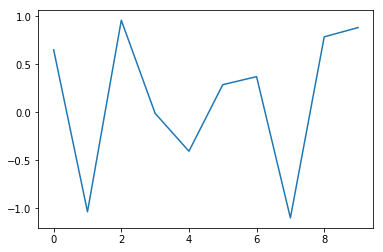

In [125]:
s.plot()

In [126]:
df = DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
df.cumsum()

,normal,gamma,poisson
0,-0.905900,0.425934,1.0
1,-2.619632,1.073626,3.0
2,-3.563359,1.268087,4.0
3,-4.800344,1.847136,5.0
4,-5.704857,3.264487,7.0
5,-4.773702,3.501401,9.0
6,-5.240803,3.629288,12.0
7,-5.536329,3.722618,15.0
8,-3.954131,7.081626,15.0
9,-3.450354,7.272060,16.0


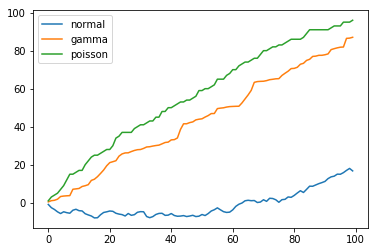

In [127]:
df.cumsum().plot()

In [128]:
data = {
    'name':['张三', '李四', '王五', '小明', 'Peter'],
    'sex':['female', 'female', 'male', 'male','male'],
    'year':[2001, 2001, 2003, 2002, 2002],
    'city':['北京', '上海', '广州', '北京', '北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京
4,Peter,male,2002,北京


In [129]:
df['sex'].value_counts()

male      3
female    2
Name: sex, dtype: int64

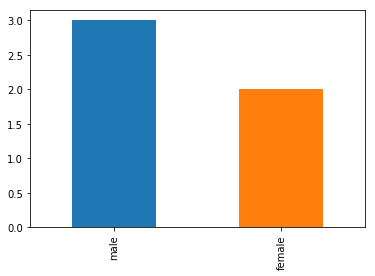

In [130]:
df['sex'].value_counts().plot(kind='bar')

In [131]:
df2 = DataFrame(np.random.randint(0,100,size=(3,3)),
               index=('one','two','three'),
               columns = ['A','B','C'])
df2

,A,B,C
one,87,33,17
two,93,34,5
three,19,5,56


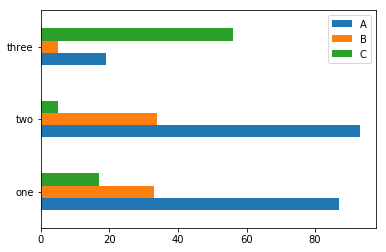

In [132]:
df2.plot(kind='barh')

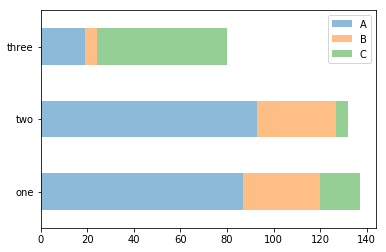

In [133]:
df2.plot(kind='barh',stacked=True,alpha=0.5)

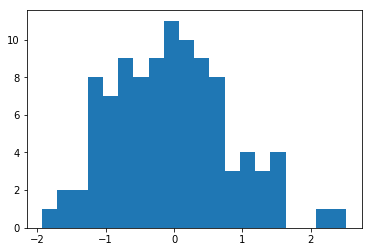

In [134]:
s = Series(np.random.normal(size=100))
s.hist(bins=20,grid=False)

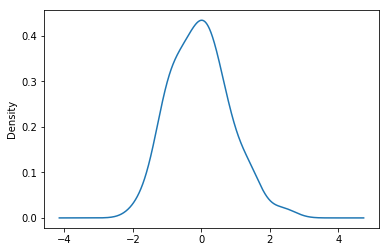

In [135]:
s.plot(kind='kde')

In [136]:
df3 = DataFrame(np.arange(10),columns=['X'])
df3['Y'] = 2 * df3['X'] + 5
df3

,X,Y
0,0,5
1,1,7
2,2,9
3,3,11
4,4,13
5,5,15
6,6,17
7,7,19
8,8,21
9,9,23


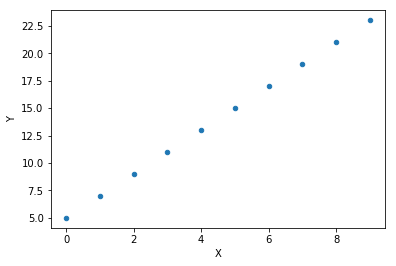

In [137]:
 df3.plot(kind='scatter',x='X',y='Y')

## 综合案例

In [139]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns   #导入seaborn库

In [140]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
tips.shape

(244, 7)

In [142]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [143]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


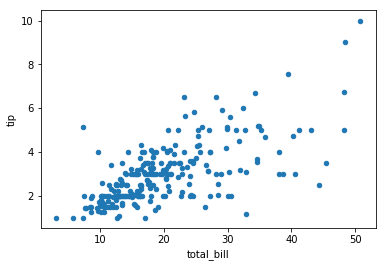

In [144]:
 tips.plot(kind='scatter',x='total_bill',y='tip')

In [145]:
male_tip = tips[tips['sex'] == 'Male']['tip'].mean()
male_tip

3.0896178343949052

In [146]:
female_tip = tips[tips['sex'] == 'Female']['tip'].mean()
female_tip

2.833448275862069

In [147]:
s = Series([male_tip,female_tip],index=['male','female'])
s

male      3.089618
female    2.833448
dtype: float64

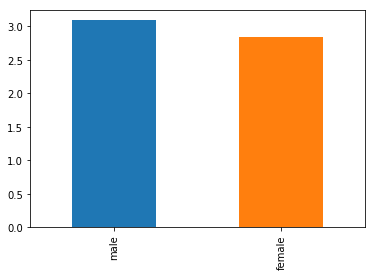

In [148]:
s.plot(kind='bar')

In [149]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [150]:
sun_tip = tips[tips['day'] == 'Sun']['tip'].mean()
sat_tip = tips[tips['day'] == 'Sat']['tip'].mean()
thur_tip = tips[tips['day'] == 'Thur']['tip'].mean()
fri_tip = tips[tips['day'] == 'Fri']['tip'].mean()

In [151]:
s = Series([thur_tip,fri_tip,sat_tip,sun_tip],index=['Thur','Fri','Sat','Sun'])
s

Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
dtype: float64

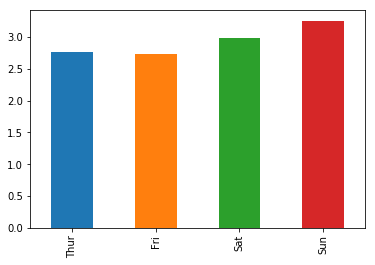

In [152]:
s.plot(kind='bar')

In [153]:
tips['percent_tip'] = tips['tip']/(tips['total_bill']+tips['tip'])
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014
5,25.29,4.71,Male,No,Sun,Dinner,4,0.157000
6,8.77,2.00,Male,No,Sun,Dinner,2,0.185701
7,26.88,3.12,Male,No,Sun,Dinner,4,0.104000
8,15.04,1.96,Male,No,Sun,Dinner,2,0.115294
9,14.78,3.23,Male,No,Sun,Dinner,2,0.179345


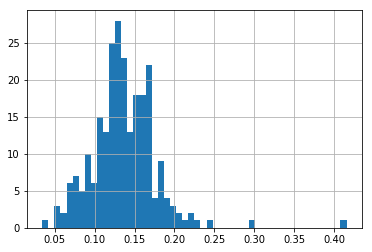

In [154]:
tips['percent_tip'].hist(bins=50)